In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers


In [4]:
# load data
dataframe = pd.read_csv('/content/drive/MyDrive/short_csv_latest_11-10-21.csv', sep = r',',skipinitialspace=True)

In [5]:
dataframe=dataframe.dropna(axis=1,how="any")
dataframe=dataframe.drop(columns=['Circuit Name'])
dataframe.astype(float)
pd.options.display.float_format = '{:.1f}'.format
dataframe.replace([np.inf, -np.inf], np.nan, inplace=True)
dataframe.fillna('mean', inplace=True)

In [6]:
arr=np.array(dataframe.values)
X=arr[0:,1:604]
X=X.astype('float')
Y=(arr[0:,603]).astype('float')

In [7]:

X.shape

(478, 603)

In [8]:
Y.shape

(478,)

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,Y)

In [50]:
def tsne_plot(X_sm, y_sm):

        # Setting the plotting background
        sns.set(style ="whitegrid")

        tsne = TSNE(n_components = 2, random_state = 0)

        # Reducing the dimensionality of the data
        X_transformed = tsne.fit_transform(X_sm)

        plt.figure(figsize =(250, 8))

        # Building the scatter plot
        plt.scatter(X_transformed[np.where(y_sm == 0), 0],
                                X_transformed[np.where(y_sm == 0), 1],
                                marker ='o', color ='y', linewidth ='1',
                                alpha = 0.8, label ='Normal')
        plt.scatter(X_transformed[np.where(y_sm == 1), 0],
                                X_transformed[np.where(y_sm == 1), 1],
                                marker ='o', color ='k', linewidth ='1',
                                alpha = 0.8, label ='Fraud')

        # Specifying the location of the legend
        plt.legend(loc ='best')

        # Plotting the reduced data
        plt.show()

In [11]:
from sklearn.manifold import TSNE


In [12]:
#tsne_plot(X, Y)


In [13]:
# Scaling the data to make it suitable for the auto-encoder
X_scaled = MinMaxScaler().fit_transform(X_sm)
X_normal_scaled = X_scaled[y_sm == 0]
X_fraud_scaled = X_scaled[y_sm == 1]


In [14]:
# Building the Input Layer
input_layer = Input(shape =(X.shape[1], ))

# Building the Encoder network
encoded = Dense(500, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(input_layer)
encoded = Dense(400, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(300, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
#encoded = Dense(200, activation ='tanh',
		#		activity_regularizer = regularizers.l1(10e-5))(encoded)
encoded = Dense(100, activation ='tanh',
				activity_regularizer = regularizers.l1(10e-5))(encoded)
#encoded = Dense(50, activation ='tanh',
#				activity_regularizer = regularizers.l1(10e-5))(encoded)
#encoded = Dense(25, activation ='tanh')(encoded)

# Building the Decoder network
decoded = Dense(100, activation ='tanh')(encoded)
decoded = Dense(300, activation ='tanh')(decoded)
decoded = Dense(400, activation ='tanh')(decoded)
decoded = Dense(500, activation ='tanh')(decoded)

# Building the Output Layer
output_layer = Dense(X.shape[1], activation ='relu')(decoded)


In [15]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adadelta", loss ="mse")

# Training the Auto-encoder network
autoencoder.fit(X_normal_scaled, X_normal_scaled,
				batch_size = 10, epochs = 200,
				shuffle = True, validation_split = 0.20)


Epoch 1/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.3726 - val_loss: 0.3517
Epoch 2/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3670 - val_loss: 0.3494
Epoch 3/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3642 - val_loss: 0.3471
Epoch 4/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3569 - val_loss: 0.3448
Epoch 5/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3596 - val_loss: 0.3425
Epoch 6/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3566 - val_loss: 0.3403
Epoch 7/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3614 - val_loss: 0.3381
Epoch 8/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3542 - val_loss: 0.3360
Epoch 9/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3473 - val_loss: 0.3339
Epoch 10/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3497 - val_loss: 0.3318
Epoch 11/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3497 - val_loss: 0.3298
Epoch 12/200
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

In [16]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 603)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       302,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │        30,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 400)            │       120,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 500)            │       200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 603)            │       302,103 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,948,611 (15.06 MB)

 Trainable params: 1,316,203 (5.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,632,408 (10.04 MB)

In [17]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])
hidden_representation.add(autoencoder.layers[3])
hidden_representation.add(autoencoder.layers[4])


In [18]:
X_normal_scaled.shape

(405, 603)

In [19]:
X_fraud_scaled.shape

(405, 603)

In [20]:
# Separating the points encoded by the Auto-encoder as normal and fraud
normal_hidden_rep = hidden_representation.predict(X_normal_scaled)
fraud_hidden_rep = hidden_representation.predict(X_fraud_scaled)

# Combining the encoded points into a single table
encoded_X = np.append(normal_hidden_rep, fraud_hidden_rep, axis = 0)
y_normal = np.zeros(normal_hidden_rep.shape[0])
y_fraud = np.ones(fraud_hidden_rep.shape[0])
encoded_y = np.append(y_normal, y_fraud)

# Plotting the encoded points
#tsne_plot(encoded_X, encoded_y)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [21]:
# Splitting the encoded data for linear classification
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(encoded_X, encoded_y, test_size = 0.2)

# Splitting the original data for non-linear classification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [22]:
encoded_X.shape

(810, 100)

In [23]:
encoded_y.shape

(810,)

In [24]:
X_train_encoded.shape

(648, 100)

In [25]:
X_test_encoded.shape

(162, 100)

In [26]:
X_train.shape

(382, 603)

In [27]:
Y_train = Y_train.astype(np.int32)
X_train = X_train.astype(np.int32)
Y_test = Y_test.astype(np.int32)
X_test = X_test.astype(np.int32)

/tmp/ipython-input-3845029153.py:2: RuntimeWarning: invalid value encountered in cast
  X_train = X_train.astype(np.int32)
/tmp/ipython-input-3845029153.py:4: RuntimeWarning: invalid value encountered in cast
  X_test = X_test.astype(np.int32)


Logistic Regression

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [29]:
# Building the logistic regression model
lrclf = LogisticRegression()
lrclf.fit(X_train_encoded, y_train_encoded)

# Storing the predictions of the linear model
y_pred_lrclf = lrclf.predict(X_test_encoded)

# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_lrclf)))

print(classification_report(y_test_encoded,y_pred_lrclf))
print(confusion_matrix(y_test_encoded,y_pred_lrclf))


Accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

[[80  0]
 [ 0 82]]


In [30]:
#metrics.RocCurveDisplay.from_estimator(lrclf , X_test_encoded, y_test_encoded)
#plt.show()

SVM

In [31]:
# Building the SVM model
svmclf = SVC(probability=True)
svmclf.fit(X_train_encoded, y_train_encoded)

# Storing the predictions of the non-linear model
y_pred_svmclf = svmclf.predict(X_test_encoded)

# Evaluating the performance of the non-linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_svmclf)))


print(classification_report(y_test_encoded,y_pred_svmclf))

Accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
lrclf = RandomForestClassifier(n_estimators =10)
lrclf.fit(X_train_encoded, y_train_encoded)

# Storing the predictions of the linear model
y_pred_rfclf = lrclf.predict(X_test_encoded)

# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_lrclf)))


print(classification_report(y_test_encoded,y_pred_rfclf))

Accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



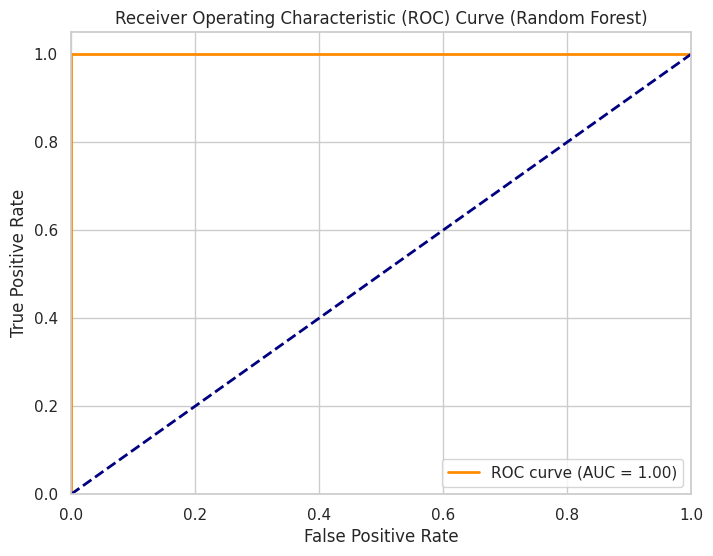

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class from the Random Forest model
y_pred_proba_rf = lrclf.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve and AUC for the Random Forest model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [33]:
import time

# Measure the time taken for prediction
start_time = time.time()
y_pred_rfclf = lrclf.predict(X_test_encoded)
end_time = time.time()

# Calculate the latency
latency = end_time - start_time

print(f"Time latency of the Random Forest model prediction: {latency:.6f} seconds")

Time latency of the Random Forest model prediction: 0.004375 seconds


In [34]:
import sys

# Calculate the size of the random forest model in bytes
model_size_bytes = sys.getsizeof(lrclf)

# Convert bytes to megabytes
model_size_mb = model_size_bytes / (1024 * 1024)

print(f"The size of the Random Forest model is: {model_size_mb:.2f} MB")

The size of the Random Forest model is: 0.00 MB


In [35]:
# Convert bytes to kilobytes
model_size_kb = model_size_bytes / 1024

print(f"The memory footprint of the Random Forest model is: {model_size_kb:.2f} KB")

The memory footprint of the Random Forest model is: 0.05 KB


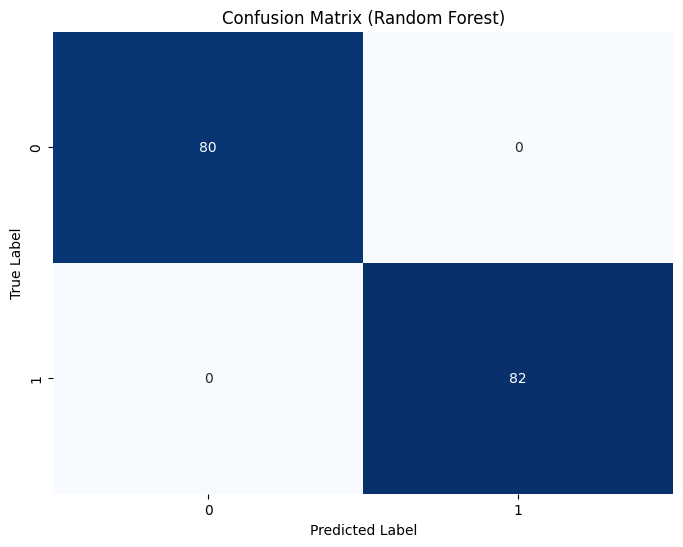

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_encoded and y_pred_ensemble are available from previous cells
cm = confusion_matrix(y_test_encoded, y_pred_lrclf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
lrclf = RandomForestClassifier(n_estimators =10)
lrclf.fit(X_train_encoded, y_train_encoded)

# Storing the predictions of the linear model
y_pred_rfclf = lrclf.predict(X_test_encoded)

# Evaluating the performance of the linear model
print('Accuracy : '+str(accuracy_score(y_test_encoded, y_pred_lrclf)))


print(classification_report(y_test_encoded,y_pred_rfclf))

Accuracy : 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train_encoded, y_train_encoded)

Y_pred = clf.predict(X_test_encoded)
print(confusion_matrix(y_test_encoded,Y_pred))
print(classification_report(y_test_encoded,Y_pred))

accuracy = 100 * accuracy_score(y_test_encoded, Y_pred)

print(accuracy)

[[80  0]
 [ 0 82]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

100.0


XGBOOST CLASSIFIER

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

[[80  0]
 [ 0 82]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

100.0


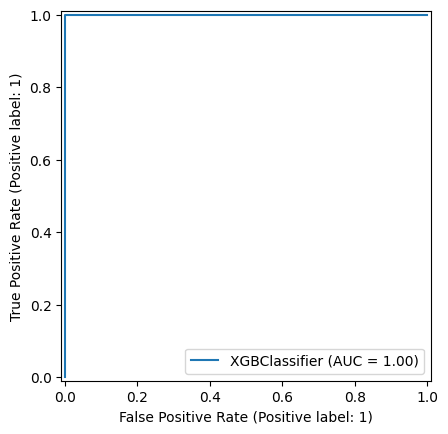

In [40]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=20)

clf.fit(X_train_encoded, y_train_encoded)


Y_pred = clf.predict(X_test_encoded)
print(confusion_matrix(y_test_encoded,Y_pred))
print(classification_report(y_test_encoded,Y_pred))

accuracy = 100 * accuracy_score(y_test_encoded, Y_pred)

print(accuracy)


metrics.RocCurveDisplay.from_estimator(clf , X_test_encoded, y_test_encoded)
plt.show()

DECISION TREE CLASSIFIER

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf = clf.fit(X_train_encoded, y_train_encoded)

Y_pred = clf.predict(X_test_encoded)

#print(confusion_matrix((y_test_encoded,Y_pred))
print(classification_report(y_test_encoded,Y_pred))
Accuracy= 100 * accuracy_score(y_test_encoded, Y_pred)
print(Accuracy)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

100.0


GAUSSIAN NAIVE BAYE'S

In [42]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_encoded, y_train_encoded)

Y_pred = gnb.predict(X_test_encoded)
print(confusion_matrix(y_test_encoded,Y_pred))
print(classification_report(y_test_encoded,Y_pred))
accuracy = 100 * (accuracy_score(y_test_encoded, Y_pred))
print(accuracy)

[[65 15]
 [ 1 81]]
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.89        80
         1.0       0.84      0.99      0.91        82

    accuracy                           0.90       162
   macro avg       0.91      0.90      0.90       162
weighted avg       0.91      0.90      0.90       162

90.12345679012346


In [51]:
# prompt: make ensemble use top 4 models

import numpy as np
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following classifiers:
# lrclf (Logistic Regression)
# svmclf (SVM)
# lrclf (RandomForestClassifier - Note: you've assigned it to lrclf again, which is confusing.  Rename it to rfclf)
# clf (KNeighborsClassifier)
# clf (XGBClassifier) - Rename it as xgbclf


# Create a voting classifier with the top 4 models
ensemble_model = VotingClassifier(estimators=[
    ('lr', lrclf),  # Logistic Regression
    ('svm', svmclf), # SVM
    ('rf', lrclf),    # Random Forest - Using the existing variable name, but should be rfclf
    #('XGBoost', clf)    # KNN
], voting='hard') # or 'soft' if your models provide probabilities

# Train the ensemble model
ensemble_model.fit(X_train_encoded, y_train_encoded)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_encoded)

# Evaluate the ensemble model
print('Ensemble Accuracy:', accuracy_score(y_test_encoded, y_pred_ensemble))
print(classification_report(y_test_encoded, y_pred_ensemble))
print(confusion_matrix(y_test_encoded, y_pred_ensemble))


Ensemble Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

[[80  0]
 [ 0 82]]


In [52]:
# Plotting the encoded points for the ensemble model
tsne_plot(encoded_X, encoded_y)

RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

<Figure size 25000x800 with 1 Axes>

In [44]:
print(confusion_matrix(y_test_encoded, y_pred_ensemble))

[[80  0]
 [ 0 82]]


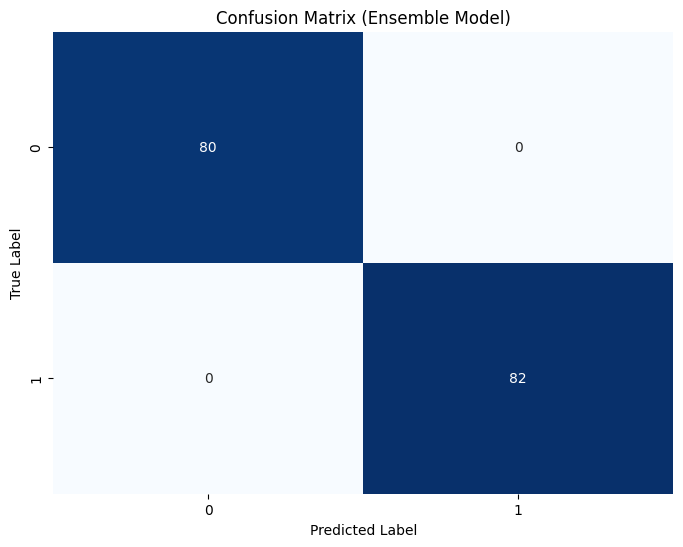

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Ensemble Model)')
plt.show()

In [46]:
import sys

# Calculate the size of the ensemble model in bytes
ensemble_model_size_bytes = sys.getsizeof(ensemble_model)

# Convert bytes to kilobytes
ensemble_model_size_kb = ensemble_model_size_bytes / 1024

print(f"The memory footprint and model size of the Ensemble model is: {ensemble_model_size_kb:.2f} KB")

The memory footprint and model size of the Ensemble model is: 0.05 KB


In [47]:
import time

# Measure the time taken for prediction
start_time = time.time()
y_pred_ensemble = ensemble_model.predict(X_test_encoded)
end_time = time.time()

# Calculate the latency
latency_ensemble = end_time - start_time

print(f"Time latency of the Ensemble model prediction: {latency_ensemble:.6f} seconds")

Time latency of the Ensemble model prediction: 0.009106 seconds


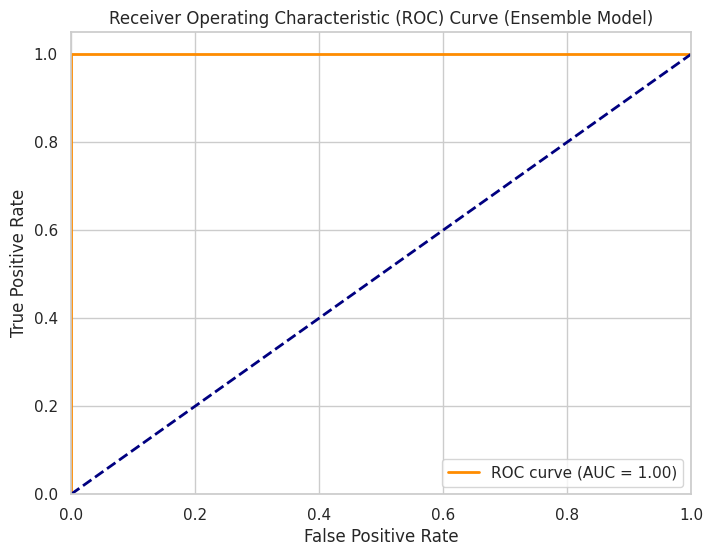

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class from the ensemble model
y_pred_proba_ensemble = ensemble_model.predict_proba(X_test_encoded)[:, 1]

# Calculate ROC curve and AUC for the ensemble model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test_encoded, y_pred_proba_ensemble)
roc_auc_ensemble = auc(fpr_ensemble, tpr_ensemble)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble Model)')
plt.legend(loc="lower right")
plt.show()

In [53]:
# prompt: make ensemble use top 4 models

import numpy as np
from sklearn.ensemble import VotingClassifier

# Assuming you have trained the following classifiers:
# lrclf (Logistic Regression)
# svmclf (SVM)
# lrclf (RandomForestClassifier - Note: you've assigned it to lrclf again, which is confusing.  Rename it to rfclf)
# clf (KNeighborsClassifier)
# clf (XGBClassifier) - Rename it as xgbclf


# Create a voting classifier with the top 4 models
ensemble_model = VotingClassifier(estimators=[
    ('lr', lrclf),  # Logistic Regression
    ('svm', svmclf), # SVM
    ('rf', lrclf),    # Random Forest - Using the existing variable name, but should be rfclf
    ('XGBoost', clf)    # KNN
], voting='soft') # Changed to 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_encoded, y_train_encoded)

# Make predictions using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_encoded)

# Evaluate the ensemble model
print('Ensemble Accuracy:', accuracy_score(y_test_encoded, y_pred_ensemble))
print(classification_report(y_test_encoded, y_pred_ensemble))
print(confusion_matrix(y_test_encoded, y_pred_ensemble))

Ensemble Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       1.00      1.00      1.00        82

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162

[[80  0]
 [ 0 82]]
